# Import Dataset

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sid200026","key":"24089859f34a2cca23aa97db735e589e"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:04<00:00, 14.8MB/s]
100% 66.0M/66.0M [00:04<00:00, 13.9MB/s]


In [6]:
! mkdir dataset

In [7]:
! unzip creditcardfraud.zip -d dataset

Archive:  creditcardfraud.zip
  inflating: dataset/creditcard.csv  


# Data Preprocessing

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = pd.read_csv('dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
data.Class.value_counts() 

0    284315
1       492
Name: Class, dtype: int64

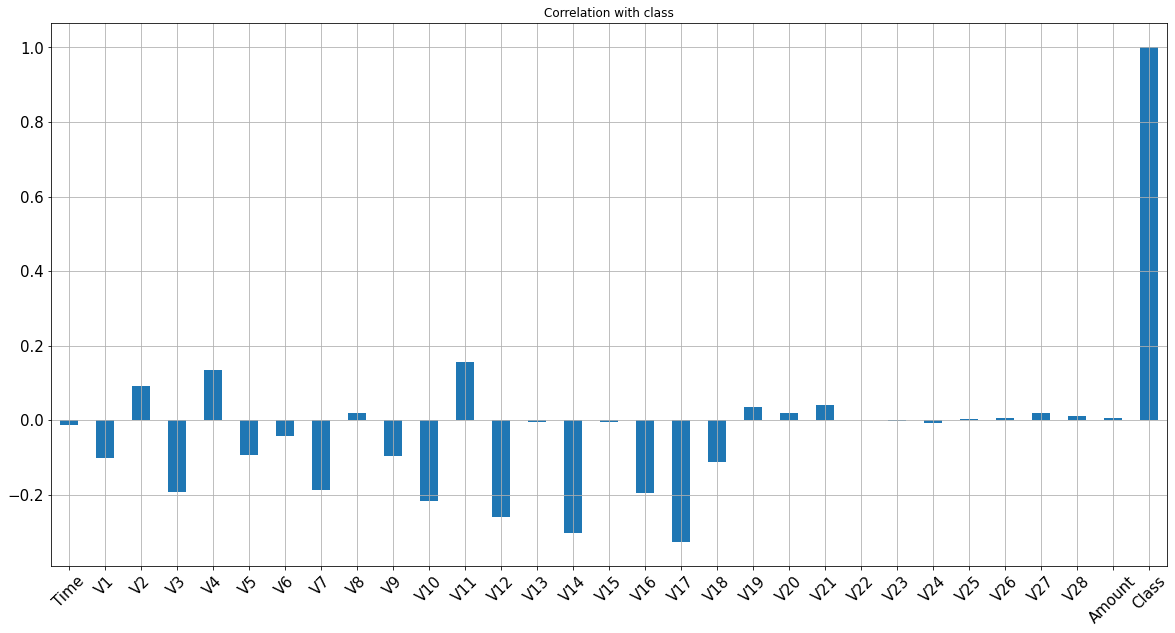

In [12]:
data.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [13]:
data.corrwith(data.Class, axis=0)

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
dtype: float64

In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
data = data.drop(['Time'], axis=1)
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [16]:
X = data.iloc[:,:-1].values
X[:3]

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
         1.37815522e+00, -3.38320770e-01,  4.62387778e-01,
         2.39598554e-01,  9.86979013e-02,  3.63786970e-01,
         9.07941720e-02, -5.51599533e-01, -6.17800856e-01,
        -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
        -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,
         4.03992960e-01,  2.51412098e-01, -1.83067779e-02,
         2.77837576e-01, -1.10473910e-01,  6.69280749e-02,
         1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
        -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01,
         4.48154078e-01,  6.00176493e-02, -8.23608088e-02,
        -7.88029833e-02,  8.51016549e-02, -2.55425128e-01,
        -1.66974414e-01,  1.61272666e+00,  1.06523531e+00,
         4.89095016e-01, -1.43772296e-01,  6.35558093e-01,
         4.63917041e-01, -1.14804663e-01, -1.83361270e-01,
        -1.45783041e-01, -6.90831352e-02, -2.25775248e-01,
        -6.38

In [17]:
y = data.iloc[:,-1].values
y[:4]

array([0, 0, 0, 0])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, test_size = 0.2)
X_train

array([[ 1.20204430e+00,  1.47536998e-01,  6.02971191e-01, ...,
        -3.77824539e-02,  9.25761123e-03,  1.98000000e+00],
       [ 2.12669635e-01,  9.85989078e-01, -7.50916387e-01, ...,
        -7.18093502e-03,  5.16065944e-03,  2.87000000e+00],
       [-4.61721720e+00,  1.69569365e+00, -3.11437220e+00, ...,
        -1.00204143e+00,  8.90780288e-01,  1.10000000e+00],
       ...,
       [ 9.42883319e-01,  3.53066527e-01,  6.71608120e-01, ...,
         6.10915867e-02,  5.49306652e-03,  9.91000000e+00],
       [-5.31536169e-01,  8.54556448e-01,  1.59559255e+00, ...,
        -4.43683985e-01, -4.66231204e-01,  1.14000000e+02],
       [-6.04094110e-01,  1.25643546e+00,  1.07382762e+00, ...,
         2.76006249e-01,  9.11944409e-02,  3.27000000e+00]])

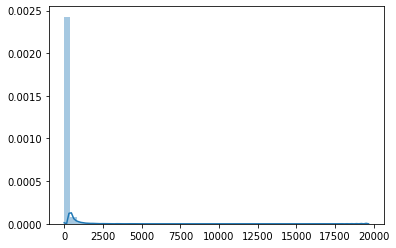

In [19]:
sns.distplot(X_train[:,-1])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(X_train[:,-1].reshape(-1,1))
normalisedAmount = scaler_fit.transform(X_train[:,-1].reshape(-1,1))
normalisedAmount

array([[-0.34998492],
       [-0.34638764],
       [-0.35354177],
       ...,
       [-0.31793278],
       [ 0.10278684],
       [-0.34477089]])

In [21]:
X_train[:,-1] = normalisedAmount.reshape(1,-1)
X_train[:,-1]

array([-0.34998492, -0.34638764, -0.35354177, ..., -0.31793278,
        0.10278684, -0.34477089])

# Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(random_state = 0,
                                    criterion = 'gini',  splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
y_pred = classifier_decision_tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
acc = accuracy_score(y_test, y_pred)
acc

0.9961377760612338

In [26]:
prec = precision_score(y_test, y_pred)
prec

0.2826855123674912

In [27]:
rec = recall_score(y_test, y_pred)
rec

0.8247422680412371

In [28]:
f1 = f1_score(y_test, y_pred)
f1

0.42105263157894735

In [29]:
results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier_random_forest = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = classifier_random_forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
acc = accuracy_score(y_test, y_pred)
acc

0.9996137776061234

In [33]:
prec = precision_score(y_test, y_pred)
prec

0.9411764705882353

In [34]:
rec = recall_score(y_test, y_pred)
rec

0.8247422680412371

In [35]:
f1 = f1_score(y_test, y_pred)
f1

0.879120879120879

In [36]:
model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
import random
verbosity = random.randint(1,100)
classifier_logistic_regression = clf = LogisticRegression(random_state=0, max_iter=200, verbose=verbosity)
classifier_logistic_regression.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=58,
                   warm_start=False)

In [38]:
y_pred = classifier_logistic_regression.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [39]:
acc = accuracy_score(y_test, y_pred)
acc

0.6038938239528107

In [40]:
prec = precision_score(y_test, y_pred)
prec

0.003579635849390136

In [41]:
rec = recall_score(y_test, y_pred)
rec

0.8350515463917526

In [42]:
f1 = f1_score(y_test, y_pred)
f1

0.007128712871287129

In [43]:
model_results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121
2,Logistic Regression,0.603894,0.003580,0.835052,0.007129


# Support Vector Machine



In [44]:
from sklearn.svm import SVC
random_state = random.randint(1,100)
classifier_svc = SVC(kernel='rbf', degree=5, random_state=random_state)
classifier_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=29, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
y_pred = classifier_svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
acc = accuracy_score(y_test, y_pred)
acc

0.9988062216916541

In [47]:
prec = precision_score(y_test, y_pred)
prec

0.967741935483871

In [48]:
rec = recall_score(y_test, y_pred)
rec

0.30927835051546393

In [49]:
f1 = f1_score(y_test, y_pred)
f1

0.46875

In [50]:
model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121
2,Logistic Regression,0.603894,0.003580,0.835052,0.007129
3,Support Vector Machine,0.998806,0.967742,0.309278,0.468750


# Neural Network Multi-Layer Perceptron using Sklearn

In [67]:
from sklearn.neural_network import MLPClassifier
random_state = random.randint(1,100)
classifier_mtp = MLPClassifier(n_iter_no_change = 50, max_iter = 300, random_state=random_state)
classifier_mtp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=50, nesterovs_momentum=True,
              power_t=0.5, random_state=23, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [68]:
y_pred = classifier_mtp.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
acc = accuracy_score(y_test, y_pred)
acc

0.9830939924862189

In [70]:
prec = precision_score(y_test, y_pred)
prec

0.06174089068825911

In [71]:
rec = recall_score(y_test, y_pred)
rec

0.6288659793814433

In [72]:
f1 = f1_score(y_test, y_pred)
f1

0.11244239631336407

In [76]:
model_results = pd.DataFrame([['Multi Layer Perceptron', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121
2,Logistic Regression,0.603894,0.003580,0.835052,0.007129
3,Support Vector Machine,0.998806,0.967742,0.309278,0.468750
4,Multi Layer Perceptron,0.998455,0.552941,0.484536,0.516484


# Neural Network Multi-Layer Perceptron using Keras and Tensorflow

In [77]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [81]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [84]:
tf.debugging.set_log_device_placement(True)

In [85]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [89]:
classifier_ann = Sequential()
classifier_ann.add(Dense(units =30 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
classifier_ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier_ann.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier_ann.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
classifier_ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 2/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0031 - accuracy: 0.9993
Epoch 3/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 4/100
7121/7121 [==============================] - 25s 3ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 6/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 7/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 8/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 9/100
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/100
7121/7121 [==============================] - 23s 3m

In [90]:
y_pred = classifier_ann.predict(X_test)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [91]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [92]:
acc = accuracy_score(y_test, y_pred)
acc

0.9989466661985184

In [93]:
prec = precision_score(y_test, y_pred)
prec

1.0

In [94]:
rec = recall_score(y_test, y_pred)
rec

0.38144329896907214

In [95]:
f1 = f1_score(y_test, y_pred)
f1

0.5522388059701492

In [96]:
model_results = pd.DataFrame([['Neural Network using Tensorflow and Keras', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121
2,Logistic Regression,0.603894,0.003580,0.835052,0.007129
3,Support Vector Machine,0.998806,0.967742,0.309278,0.468750
4,Multi Layer Perceptron,0.998455,0.552941,0.484536,0.516484
5,Neural Network using Tensorflow and Keras,0.998947,1.000000,0.381443,0.552239


# Final Pipeline

In [109]:
x1_train = classifier_decision_tree.predict(X_train)
x2_train = classifier_random_forest.predict(X_train)
x3_train = classifier_logistic_regression.predict(X_train)
x4_train = classifier_svc.predict(X_train)
x5_train = classifier_mtp.predict(X_train)
x6_train = classifier_ann.predict(X_train).astype(int).reshape(1,-1)[0]
data = {
    'DecisionTree' : x1_train,
    'RandomForest' : x2_train,
    'LogisticRegression' : x3_train,
    'SupportVectorMachine' : x4_train,
    'MTPSklearn' : x5_train,
    'ANN' : x6_train,
    'Output': y_train,
}
pipeline_train = pd.DataFrame(data)
pipeline_train.head()


,DecisionTree,RandomForest,LogisticRegression,SupportVectorMachine,MTPSklearn,ANN,Output
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [110]:
x1_test = classifier_decision_tree.predict(X_test)
x2_test = classifier_random_forest.predict(X_test)
x3_test = classifier_logistic_regression.predict(X_test)
x4_test = classifier_svc.predict(X_test)
x5_test = classifier_mtp.predict(X_test)
x6_test = classifier_ann.predict(X_test).astype(int).reshape(1,-1)[0]
data = {
    'DecisionTree' : x1_test,
    'RandomForest' : x2_test,
    'LogisticRegression' : x3_test,
    'SupportVectorMachine' : x4_test,
    'MTPSklearn' : x5_test,
    'ANN' : x6_test,
    'Output': y_test,
}
pipeline_test = pd.DataFrame(data)
pipeline_test.head()

,DecisionTree,RandomForest,LogisticRegression,SupportVectorMachine,MTPSklearn,ANN,Output
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [112]:
pipeline_data = pd.concat([pipeline_train, pipeline_test])
pipeline_data.head()

,DecisionTree,RandomForest,LogisticRegression,SupportVectorMachine,MTPSklearn,ANN,Output
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [116]:
X = pipeline_data.iloc[:,:-1].values
X[:3]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0]])

In [117]:
y = pipeline_data.iloc[:,-1].values
y[:4]

array([0, 0, 1, 0])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, test_size = 0.2)
X_train[:1]

array([[0, 0, 0, 0, 0, 0]])

In [120]:
pipeline_classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
pipeline_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [122]:
y_pred = pipeline_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
acc = accuracy_score(y_test, y_pred)
acc

0.9999297777465679

In [124]:
prec = precision_score(y_test, y_pred)
prec

0.9770114942528736

In [125]:
rec = recall_score(y_test, y_pred)
rec

0.9770114942528736

In [126]:
f1 = f1_score(y_test, y_pred)
f1

0.9770114942528736

In [127]:
model_results = pd.DataFrame([['Final Pipeline', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.996138,0.282686,0.824742,0.421053
1,Random Forest (n=100),0.999614,0.941176,0.824742,0.879121
2,Logistic Regression,0.603894,0.003580,0.835052,0.007129
3,Support Vector Machine,0.998806,0.967742,0.309278,0.468750
4,Multi Layer Perceptron,0.998455,0.552941,0.484536,0.516484
5,Neural Network using Tensorflow and Keras,0.998947,1.000000,0.381443,0.552239
6,Final Pipeline,0.999930,0.977011,0.977011,0.977011


In [129]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.98      0.98      0.98        87

    accuracy                           1.00     56962
   macro avg       0.99      0.99      0.99     56962
weighted avg       1.00      1.00      1.00     56962



Test Data Accuracy: 0.9999


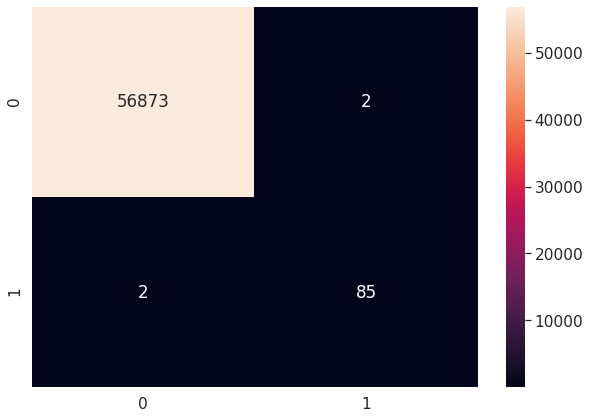

In [130]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Save classifiers

In [145]:
import pickle
classifiers = [classifier_decision_tree, classifier_random_forest, 
               classifier_logistic_regression, classifier_svc, 
               classifier_mtp, pipeline_classifier]
filenames = ['decision_tree.sav', 'random_forest.sav',
            'logistic_regression.sav', 'svc.sav',
            'mtp.sav', 'pipeline.sav']
for classifier, filename in zip(classifiers, filenames):
  pickle.dump(classifier, open(filename, 'wb'))

In [151]:
model_json = classifier_ann.to_json()
with open("ann.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier_ann.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [143]:
!pwd

/content


# GPU Speedup

In [80]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.89110337399984
GPU (s):
0.1863953950000905
GPU speedup over CPU: 20x
